In [2]:
# Cell 1: 필요한 모든 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [3]:
# Cell 2: 데이터 준비
digits = load_digits()
X = digits.data
y = digits.target

print("=== 데이터 정보 ===")
print(f"데이터 크기: {X.shape}")
print(f"레이블 크기: {y.shape}")
print(f"클래스 종류: {digits.target_names}")

=== 데이터 정보 ===
데이터 크기: (1797, 64)
레이블 크기: (1797,)
클래스 종류: [0 1 2 3 4 5 6 7 8 9]


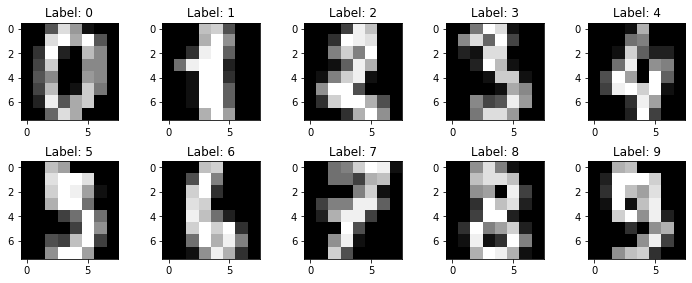

In [4]:
# Cell 3: 샘플 이미지 시각화
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {y[i]}')
plt.tight_layout()
plt.show()

In [9]:
# Cell 4: 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Cell 5: 모델 학습 및 평가
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(report['accuracy'])
    results['Precision'].append(report['macro avg']['precision'])
    results['Recall'].append(report['macro avg']['recall'])
    results['F1-score'].append(report['macro avg']['f1-score'])


results_df = pd.DataFrame(results)
results_df

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.841667,0.844750,0.835987,0.838460
1,Random Forest,0.972222,0.974042,0.972700,0.973207
2,SVM,0.986111,0.987153,0.986598,0.986828
3,SGD Classifier,0.955556,0.955043,0.955315,0.955014
4,Logistic Regression,0.972222,0.973581,0.974370,0.973864


In [ ]:
#(6) 모델을 평가해 보기
# 손글씨 숫자 분류의 경우 다음 지표들이 중요합니다:

# 1. 정확도(Accuracy)
# - 전체 숫자 중에서 올바르게 분류한 비율
# - 모든 숫자가 동일하게 중요하므로 전체 정확도가 중요

# 2. 정밀도(Precision)
# - "이 숫자는 7이다"라고 했을 때 실제로 7인 비율
# - 각 숫자별로 얼마나 정확하게 분류했는지 확인 가능

# 3. 재현율(Recall)
# - 실제 7인 숫자들 중에서 제대로 찾아낸 비율
# - 특정 숫자를 얼마나 잘 인식하는지 확인 가능

# 손글씨 숫자 분류에서는 모든 숫자가 동등하게 중요하므로,
# 정확도(Accuracy)와 각 숫자별 F1-score를 균형있게 보는 것이 좋습니다.
# 이유: 
# 1. 특정 숫자를 다른 숫자로 잘못 인식하는 것이 특별히 치명적이지 않음
# 2. 모든 숫자를 골고루 잘 인식하는 것이 중요
# 3. 실생활에서 모든 숫자가 비슷한 빈도로 사용됨 

In [ ]:
SVM 모델이 가장 성능이 좋습니다